[< list of demos](Introduction.ipynb#demos)

<a id='top'></a>
# Binary system simulation - Alpha Centauri B

This demo shows how to emulate a star within a multiple star system, using [HD 128621](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+128621) as an example.

## Arguments:

`-p HD128621` - primary star. PEXO retieves target information from Simbad and astrometry from Gaia/Hipparcos

`-s HD10700B` - secondary star

`-i 'HARPS'` - instrument: HARPS

`-t '2450000 2453000 10'` - epochs, JD from 2450000 to 2453000, every 10 days

`-m emulate` - PEXO mode

`-v 'JDutc BJDtdb BJDtcb` - output variables

`-o ../results/aCenB-out.txt` - output file

### Parameter file

To specify binary system parameters, create a `.par` file with the following quantities:

- `secondary` - secondary name

- `mass` - the primary mass in solar units

- `logmC` - the companion(secondary) mass in log solar units

- `logP` - the period in log scale of days

- `e` - the eccentricity

- `omegaT` - the target star argument of periastron

- `Omega` - the longitude of ascending node

- `Tp` - the epoch at the periastron

Save the file to `pexo/input/<starname>.par` and PEXO will find it using the primary star name you specify.

The [example file](../input/HD128621.par) contents for this demo are shown below:

In [1]:
from utilities import Table
Table("../input/HD128621.par", take_all=True, header=None, left_header=0)

secondary,HD128620
mass,0.937
logmC,-0.064
logP,10.281
e,0.517
I,79.32
omegaT,232
Omega,205
Tp,2435328.96


## Run the code

Execute PEXO with the command below. This may take a few minutes to compute.

In [1]:
# cd into the code directory
%cd ../code

# run PEXO via the R script
! Rscript pexo.R -p HD128621 -i HARPS -t '2450000 2453000 10' -m emulate -v 'JDutc BJDtdb BJDtcb ZB' -o ../results/aCenB-out.txt

/home/timberhill/repositories/pexo/code
Warning message:
package ‘optparse’ was built under R version 3.6.3 
Loading required package: polynom
Warning messages:
1: package ‘orthopolynom’ was built under R version 3.6.3 
2: package ‘polynom’ was built under R version 3.6.3 

Attaching package: ‘pracma’

The following object is masked from ‘package:polynom’:

    integral

Warning message:
package ‘pracma’ was built under R version 3.6.3 
Warning message:
package ‘foreach’ was built under R version 3.6.3 
Loading required package: iterators
Loading required package: parallel
Warning messages:
1: package ‘doMC’ was built under R version 3.6.3 
2: package ‘iterators’ was built under R version 3.6.3 

Attaching package: ‘e1071’

The following object is masked from ‘package:pracma’:

    sigmoid

Warning message:
package ‘e1071’ was built under R version 3.6.3 
Warning message:
package ‘MASS’ was built under R version 3.6.3 
Loading required package: spam
Loading required package: dotCall64


## Output

The output file (`out.txt`) contains a table with 6 columns. Julian dates are divided into integer and decimal parts to preserve precision.

In [2]:
Table("../results/aCenB-out.txt")

The plot below shows the barycentric movement in km/s.

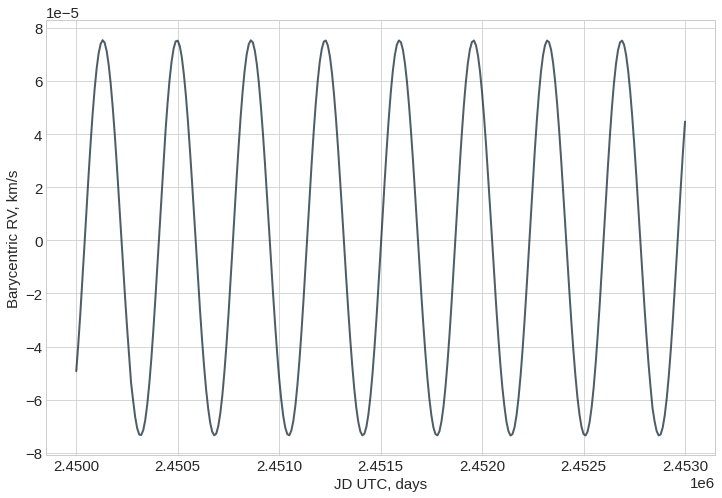

In [3]:
from utilities import Plot
p = Plot("../results/aCenB-out.txt", factors=(1, 299792.458)).add_plot(xcol=["JDutc1", "JDutc2"], ycol="ZB")
o=p.axis.set_xlabel("JD UTC, days")
o=p.axis.set_ylabel("Barycentric RV, km/s")